In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model, model_from_json
from keras.datasets import mnist
import random
import numpy as np
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Test models generated in Q1_CNN and Q1_DNN notebooks

In [2]:
# load json and create model
json_file = open('Trained_Models/Colab-Trained-Commit-ID-7d552e2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("Trained_Models/Colab-Trained-Commit-ID-7d552e2.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


Loaded model from disk


In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# Randomly draw from 10k test images

num_images_chosen = 10000
num_images_total = 1000

combo_test_X = []
combo_test_y = []

for i in range(num_images_chosen):
    
    # Randomly draw indices
    rand_A = random.randint(0, num_images_total-1)
    rand_B = random.randint(0, num_images_total-1)
    
    # Concatenate images
    image_A = test_images[rand_A]
    image_B = test_images[rand_B]
    concatenated_images = np.hstack((image_A, image_B))
    
    # Find the minimum label
    intermediate_label_A = test_labels[rand_A]
    intermediate_label_B = test_labels[rand_B]
    minimum_label = min(intermediate_label_A, intermediate_label_B)
    
    # Append to lists
    combo_test_X.append(concatenated_images)
    combo_test_y.append(minimum_label)
    
combo_test_X = np.array(combo_test_X)
combo_test_y = np.array(combo_test_y)

In [5]:
test_images = combo_test_X.reshape((combo_test_X.shape[0], 28, 56, 1))
test_images = test_images.astype('float32')/ 255

test_labels = to_categorical(combo_test_y)

In [6]:
score = loaded_model.evaluate(test_images, test_labels, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 98.71%


In [7]:
y_predict = loaded_model.predict(test_images)

Predicted: 0
True: 0


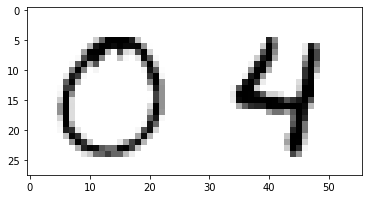

In [10]:
check_index = random.randint(0,num_images_total)
plt.imshow(test_images[check_index].reshape(28,56), cmap = plt.cm.binary)
print("Predicted: " + str(np.argmax(y_predict[check_index])))
print("True: " + str(np.argmax(test_labels[check_index])))